In [407]:
import pandas as pd
import numpy as np
import itertools
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB


In [431]:
def plot_confusion_matrix(cnf_matrix, classesNames, normalize=False,
                          cmap=plt.cm.Blues):
    """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
    """
    np.set_printoptions(precision=2)

    if normalize:
        soma = cnf_matrix.sum(axis=1)[:, np.newaxis]
        cm = cnf_matrix.astype('float') / soma
        title = "Normalized confusion matrix"
    else:
        cm = cnf_matrix
        title = 'Confusion matrix, without normalization'

    print(cm)

    plt.figure()

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classesNames))
    plt.xticks(tick_marks, classesNames, rotation=45)
    plt.yticks(tick_marks, classesNames)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [409]:
green = pd.read_csv("./data/green.csv")
X = green.iloc[:, :62]
y = green['consensus']
labels = pd.unique(y)

In [410]:
print(green.columns.values)
green.sample(5)

['cervix_area' 'os_area' 'walls_area' 'speculum_area' 'artifacts_area'
 'cervix_artifacts_area' 'os_artifacts_area' 'walls_artifacts_area'
 'speculum_artifacts_area' 'cervix_specularities_area'
 'os_specularities_area' 'walls_specularities_area'
 'speculum_specularities_area' 'specularities_area' 'area_h_max_diff'
 'rgb_cervix_r_mean' 'rgb_cervix_r_std' 'rgb_cervix_r_mean_minus_std'
 'rgb_cervix_r_mean_plus_std' 'rgb_cervix_g_mean' 'rgb_cervix_g_std'
 'rgb_cervix_g_mean_minus_std' 'rgb_cervix_g_mean_plus_std'
 'rgb_cervix_b_mean' 'rgb_cervix_b_std' 'rgb_cervix_b_mean_minus_std'
 'rgb_cervix_b_mean_plus_std' 'rgb_total_r_mean' 'rgb_total_r_std'
 'rgb_total_r_mean_minus_std' 'rgb_total_r_mean_plus_std'
 'rgb_total_g_mean' 'rgb_total_g_std' 'rgb_total_g_mean_minus_std'
 'rgb_total_g_mean_plus_std' 'rgb_total_b_mean' 'rgb_total_b_std'
 'rgb_total_b_mean_minus_std' 'rgb_total_b_mean_plus_std'
 'hsv_cervix_h_mean' 'hsv_cervix_h_std' 'hsv_cervix_s_mean'
 'hsv_cervix_s_std' 'hsv_cervix_v_mean'

,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5,consensus
17,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.510726,0.010724,0.113227,0.211889,0.084259,0.162905,0.294737,0.000000,0.000000,0.006444,...,73.746836,0.415107,0.337639,0.0,0.0,1.0,1.0,1.0,0.0,1.0
81,0.000000,0.000000,0.844745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.443455,0.012389,0.311020,0.197739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000891,...,109.427773,0.310094,0.324978,0.0,1.0,0.0,1.0,1.0,0.0,1.0
72,0.206589,0.004334,0.117341,0.341738,0.067485,0.006939,0.000000,0.415271,0.016162,0.013099,...,28.093554,0.262451,0.434576,0.0,1.0,0.0,1.0,1.0,0.0,1.0


## Logistic Regression

In [411]:
logreg = LogisticRegression()
logreg.fit(X,y)
logreg.predict(X)

C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.])

In [412]:
y_pred=logreg.predict(X)
len(y_pred)

98

In [413]:
print(metrics.accuracy_score(y,y_pred))

0.8367346938775511


## KNN (K=5)

In [414]:
knn = KNeighborsClassifier(n_neighbors=2)
model = knn.fit(X, y)
y_pred = model.predict(X)
print(metrics.accuracy_score(y,y_pred))


0.9285714285714286


## Evaluation procedure 2 - Train/test split

In [460]:
print(X.shape)
print(y.shape)

(98, 62)
(98,)


In [461]:
#trX, tsX, trY, tsY = train_test_split(X, y, train_size=0.75, random_state=int(time.time()))

In [462]:
logreg=LogisticRegression()
logreg.fit(trX, trY)

C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [463]:
y_pred = logreg.predict(tsX)
print(metrics.accuracy_score(tsY, y_pred))


0.64


In [464]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trX, trY)
y_pred = knn.predict(tsX)
print(metrics.accuracy_score(tsY, y_pred))

0.68


In [465]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(trX, trY)
y_pred = knn.predict(tsX)
print(metrics.accuracy_score(tsY, y_pred))

0.8


In [489]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)
#trX, tsX, trY, tsY = train_test_split(X, y, train_size=0.75, random_state=2)
# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trX, trY)
    y_pred = knn.predict(tsX)
    scores.append(metrics.accuracy_score(tsY, y_pred))

print(scores)


[0.84, 0.84, 0.88, 0.88, 0.8, 0.8, 0.8, 0.8, 0.76, 0.8, 0.68, 0.72, 0.72, 0.72, 0.72, 0.72, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68]


Text(0,0.5,'Testing Accuracy')

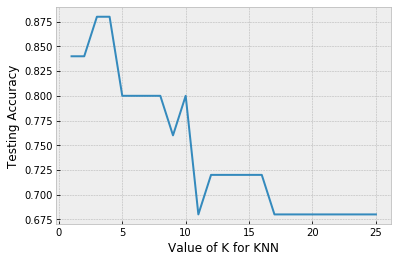

In [490]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## Naive Bayes Classifier

In [491]:
data = pd.read_csv("./data/green.csv")

In [181]:
X_train, X_test = train_test_split(data, test_size=0.5, random_state=int(time.time()))
used_features = X_train.iloc[:, :62]
abc= X_test.iloc[:, :62]
gnb = GaussianNB()
print(  used_features.values)
gnb.fit(
    used_features.values,
    X_train["consensus"]
)
y_pred = gnb.predict(abc)

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["consensus"] != y_pred).sum(),
          100*(1-(X_test["consensus"] != y_pred).sum()/X_test.shape[0])
))


[[4.99864701e-01 1.47983223e-03 1.07373074e-01 ... 8.51326164e+01
  3.49238136e-01 4.42275814e-01]
 [1.00000000e+00 1.02905471e-02 0.00000000e+00 ... 1.14582130e+02
  3.96630784e-01 2.99704373e-01]
 [3.89860917e-01 7.02929315e-03 7.53786078e-02 ... 9.31104776e+01
  5.64530654e-01 3.83141427e-01]
 ...
 [6.16233963e-01 7.98579497e-03 1.34116888e-01 ... 1.03656269e+02
  3.97520278e-01 3.76923109e-01]
 [2.90551444e-01 4.78332546e-03 0.00000000e+00 ... 5.46138906e+01
  6.26685699e-01 6.65123668e-01]
 [2.05318793e-01 1.99393065e-03 4.61818681e-02 ... 1.00427712e+02
  2.36871717e-01 1.89896609e-01]]
Number of mislabeled points out of a total 49 points : 15, performance 69.39%


In [182]:
mean_survival=np.mean(X_train["consensus"])
mean_not_survival=1-mean_survival
print("consensus prob = {:03.2f}%, Not consensus prob = {:03.2f}%"
      .format(100*mean_survival,100*mean_not_survival))

consensus prob = 65.31%, Not consensus prob = 34.69%


In [183]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn import metrics

green = pd.read_csv("./data/green.csv")

X = green.iloc[:, :62]
Y = green['consensus']

scores = []

#green.head()

print("Green data set dimensions : {}".format(green.shape))

green.groupby('consensus').size()

#Visualization of data
#green.groupby('consensus').hist(figsize=(14, 14))

green.isnull().sum()
green.isna().sum()

dataframe = pd.DataFrame(Y)
#Encoding categorical data values 
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 44)


#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Fitting the Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))

#95.8 Acuracy

#Fitting K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#95.1 Acuracy

#Fitting SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train) 
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#97.2 Acuracy

#Fitting K-SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#96.5 Acuracy

#Fitting Naive_Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#91.6 Acuracy

#Fitting Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#95.8 Acuracy

#Fitting Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#98.6 Acuracy

#predicting the Test set results
Y_pred = classifier.predict(X_test)

#Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(Y_test, Y_pred)
#c = print(cm[0, 0] + cm[1, 1])
print(scores)

Green data set dimensions : (98, 69)
[0.65, 0.8, 0.75, 0.85, 0.85, 0.85, 0.9]


C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


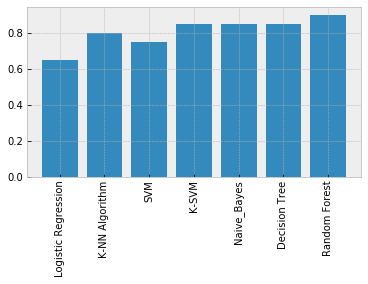

In [204]:

bars = ('Logistic Regression', 'K-NN Algorithm', 'SVM', 'K-SVM', 'Naive_Bayes','Decision Tree','Random Forest')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, scores)
 
# Create names on the x-axis
#plt.xticks(y_pos, bars, color='black')
plt.yticks(color='black')
 
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90)
 
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)

plt.style.use('bmh')
    
# Show graphic
plt.show()


In [206]:
from sklearn.tree import DecisionTreeClassifier
import graphviz 
from sklearn import tree


dataset = pd.read_csv('./data/clean_green.csv')

X = green.iloc[:, :62]
y = green['consensus']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 44)

tree1 = DecisionTreeClassifier(criterion = 'entropy').fit(X_train,Y_train)

dot_data = tree.export_graphviz(tree1, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Decision Tree Green") 

prediction = tree1.predict(X_test)

print("The prediction accuracy is: ",tree1.score(X_test,Y_test)*100,"%")

The prediction accuracy is:  85.0 %


Optimal number of features : 3


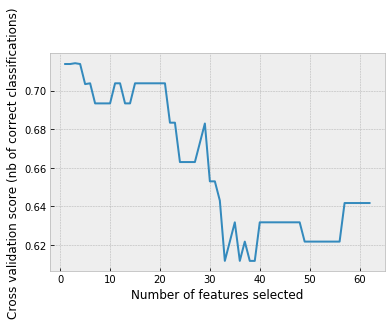

In [262]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
#X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
#                           n_redundant=2, n_repeated=0, n_classes=8,
#                           n_clusters_per_class=1, random_state=0)

dataset = pd.read_csv('./data/clean_green.csv')

X = green.iloc[:, :62]
y = green['consensus']

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [261]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

dataset = pd.read_csv('./data/clean_green.csv')
abc = dataset.iloc[:,51]
print(abc)
X = dataset.iloc[:, :62]
#y = green['consensus']
#print(dataset[60])
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print(("Num Features: %d") % fit.n_features_)
print(("Selected Features: %s") % fit.support_)
print(("Feature Ranking: %s") % fit.ranking_[51])

0     0.923067
1     0.850861
2     0.918514
3     0.951710
4     0.955996
5     0.981535
6     0.952911
7     0.938776
8     0.983082
9     0.937472
10    0.982553
11    0.953806
12    0.839318
13    0.972755
14    0.966152
15    0.909841
16    0.957827
17    0.000000
18    0.000000
19    0.993262
20    0.869386
21    0.994774
22    1.000414
23    1.007190
24    0.997806
25    0.000000
26    0.919879
27    0.997391
28    0.966948
29    1.007190
        ...   
68    1.007190
69    0.954253
70    0.937605
71    0.979833
72    0.962114
73    0.963805
74    0.984062
75    0.975458
76    0.959658
77    0.959467
78    0.915845
79    0.981043
80    0.803263
81    0.000000
82    0.992998
83    0.996484
84    0.976521
85    0.981856
86    0.979799
87    0.959607
88    0.980992
89    0.968388
90    0.965442
91    0.983180
92    0.950613
93    0.946246
94    1.007190
95    0.995485
96    0.995991
97    0.906842
Name: fit_cervix_hull_rate, Length: 98, dtype: float64


C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Num Features: 3
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False  True False False False False
  True False]
Feature Ranking: 1


C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

# dist_to_center_cervix,fit_circle_rate,fit_cervix_hull_rate

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

In [324]:
m = RFECV (RandomForestClassifier())

In [327]:
dataset = pd.read_csv('./data/clean_green.csv')
X = dataset.iloc[:, :62]
y = dataset['consensus']
m.fit(X,y)



C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\s

C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: F

C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: F

C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: F

C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: F

RFECV(cv='warn',
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [326]:
m.predict(X)

array([1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.])

In [193]:
m.score(X,y)

0.9897959183673469

In [194]:
m.transform(X).shape

(98, 25)

In [498]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing


dataset = pd.read_csv('./data/clean_green.csv')
X = dataset.iloc[:, :62]
y = dataset['consensus']

X_l1 = preprocessing.normalize(x_array, norm='l1')
X_l2 = preprocessing.normalize(X, norm='l2')

X_FS= dataset[['dist_to_center_cervix','fit_circle_rate','fit_cervix_hull_rate']]
#x_array = np.array(dataset)
#print(x_array)
#normalized_X = preprocessing.normalize([x_array])

In [382]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=123456)

[0.3521618  0.20689541 0.1031263  0.05464017 0.04114877 0.03692012
 0.03419967 0.02631994 0.02296277 0.01864895 0.01722212 0.01240036
 0.01164003 0.01128777 0.00815153 0.00728305 0.00613322 0.0054989
 0.00378074 0.00350227 0.00285239 0.00224135 0.0019112  0.00174315
 0.00150146 0.00110522 0.00092685 0.00090006 0.00085505 0.00061709]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

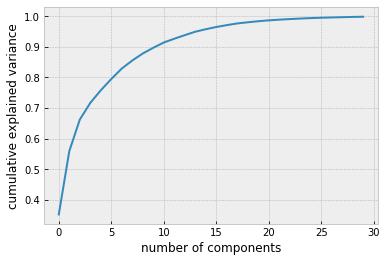

In [383]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
a=pca.fit(X_train)
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)
plt.plot(np.cumsum(a.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
print(a.explained_variance_ratio_)


from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
rf = RandomForestClassifier(max_depth=1,n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

In [492]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
cm = confusion_matrix(y_test, predicted)  
print(cm) 
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

[[ 0 15]
 [ 0 34]]
Out-of-bag score estimate: 0.673
Mean accuracy score: 0.694


In [493]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
test_score = r2_score(y_test, predicted)
spearman = spearmanr(y_test, predicted)
pearson = pearsonr(y_test, predicted)
print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

C:\Users\gonca\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\gonca\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\gonca\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\gonca\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\gonca\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Out-of-bag R-2 score estimate: 0.673
Test data R-2 score: -0.441
Test data Spearman correlation: nan
Test data Pearson correlation: nan


C:\Users\gonca\Anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\gonca\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


In [510]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing


dataset = pd.read_csv('./data/clean_green.csv')
X = dataset.iloc[:, :62]
y = dataset['consensus']
x_array = np.array(dataset)

X_l1 = preprocessing.normalize(x_array, norm='l1')
X_l2 = preprocessing.normalize(x_array, norm='l2')

X_FS= dataset[['dist_to_center_cervix','fit_circle_rate','fit_cervix_hull_rate']]
#print(x_array)
#normalized_X = preprocessing.normalize([x_array])

In [520]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_FS, y, test_size=0.5, stratify=y, random_state=123456)

In [521]:

from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
rf = RandomForestClassifier(max_depth=1,n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [522]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
cm = confusion_matrix(y_test, predicted)  
print(cm) 
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

[[ 6  9]
 [ 1 33]]
Out-of-bag score estimate: 0.796
Mean accuracy score: 0.796


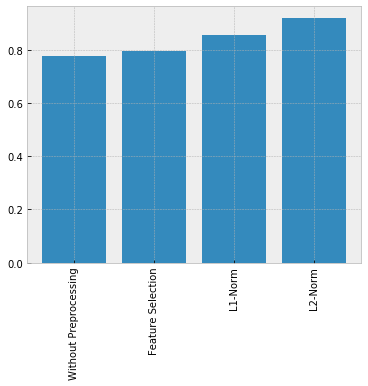

In [529]:
import numpy as np
import matplotlib.pyplot as plt
 
# Make a fake dataset:
height = [ 0.776, 0.796,0.857,0.918]
bars = ( 'Without Preprocessing', 'Feature Selection','L1-Norm','L2-Norm')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 

plt.yticks(color='black')
 
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90)
 
# Custom the subplot layout
plt.subplots_adjust(bottom=0.1, top=0.99)

plt.style.use('bmh')
    
# Show graphic
plt.show()
